<a href="https://colab.research.google.com/github/Rico2000/E-Portfolio/blob/main/E_Portfolio_Cats_vs_Dogs_Complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cats vs. Dogs


---



![](https://projects-static.raspberrypi.org/projects/cats-vs-dogs/298725f2757eac5246b8182f661b23e2b176bc56/en/images/banner.png
)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
from PIL import Image
import os
import random
from sklearn.model_selection import train_test_split          
from tensorflow.keras.datasets import cifar10

## Analyse Data

In [ ]:
IMG_SIZE = 32,32
(x_train, y_train), (x_test, y_test)  = cifar10.load_data()

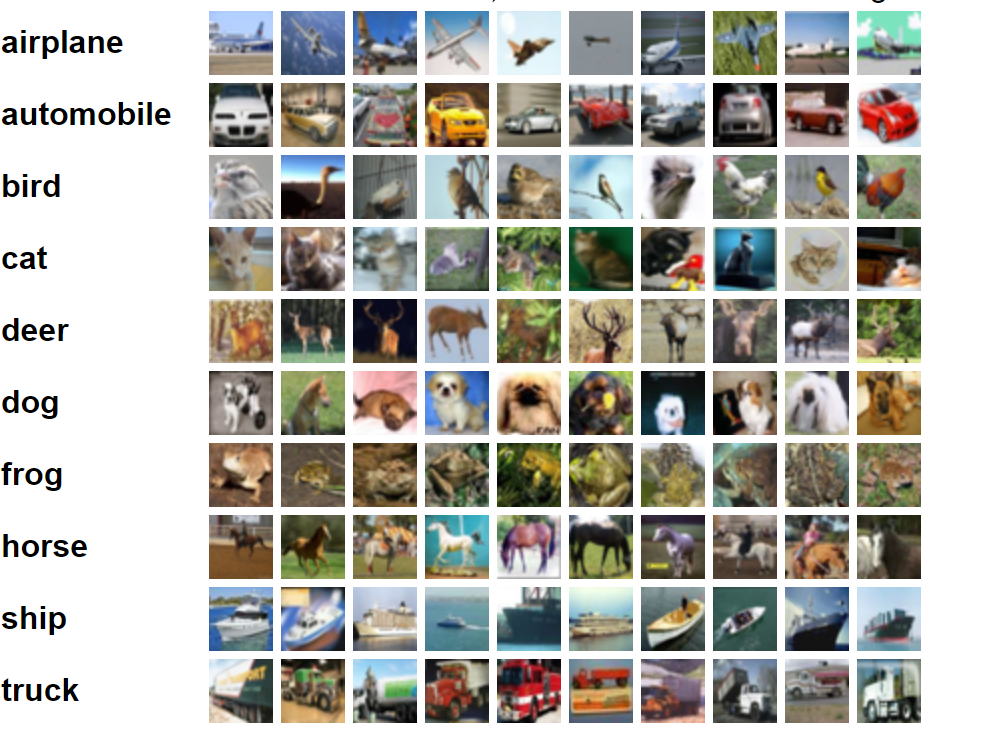

In [ ]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
index_first_class = 5
index_second_class = 6

In [ ]:
x_train.shape

(50000, 32, 32, 3)

The [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.


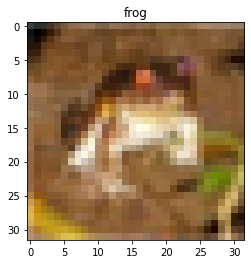

In [ ]:
img = plt.imshow(x_train[0,:,:,:])
plt.title(classes[y_train[0,0]])
plt.show()

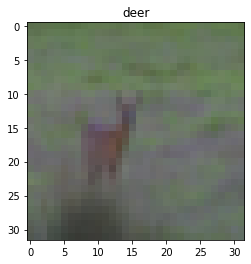

In [ ]:
img = plt.imshow(x_train[420,:,:,:])
plt.title(classes[y_train[420,0]])
plt.show()

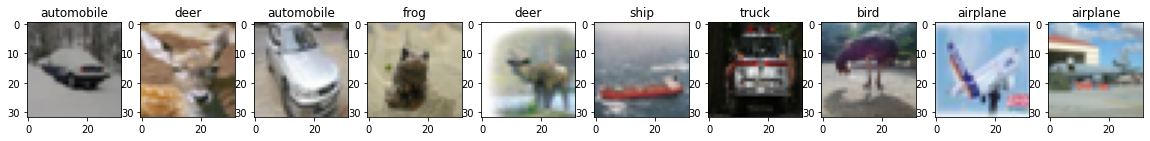

In [ ]:
rnd_index = [random.randint(0, (x_train.shape[0])) for rnd in range(10)]
fig, axs = plt.subplots(1,10, figsize=(20,2))
for i, index in enumerate(rnd_index):
    axs[i].imshow(x_train[index,:,:,], cmap = "gray")
    axs[i].set_title(classes[y_train[index,0]])  
plt.show()

In [ ]:
_, count = np.unique(y_train, return_counts= True)
for i,c in enumerate(classes):
  print(f'Im Trainingsdatensatz befinden sich {count[i]} Beispiele von {c}')

Im Trainingsdatensatz befinden sich 5000 Beispiele von airplane
Im Trainingsdatensatz befinden sich 5000 Beispiele von automobile
Im Trainingsdatensatz befinden sich 5000 Beispiele von bird
Im Trainingsdatensatz befinden sich 5000 Beispiele von cat
Im Trainingsdatensatz befinden sich 5000 Beispiele von deer
Im Trainingsdatensatz befinden sich 5000 Beispiele von dog
Im Trainingsdatensatz befinden sich 5000 Beispiele von frog
Im Trainingsdatensatz befinden sich 5000 Beispiele von horse
Im Trainingsdatensatz befinden sich 5000 Beispiele von ship
Im Trainingsdatensatz befinden sich 5000 Beispiele von truck


In [ ]:
_, count = np.unique(y_test, return_counts= True)
for i,c in enumerate(classes):
  print(f'Im Testsdatensatz befinden sich {count[i]} Beispiele von {c}')

Im Testsdatensatz befinden sich 1000 Beispiele von airplane
Im Testsdatensatz befinden sich 1000 Beispiele von automobile
Im Testsdatensatz befinden sich 1000 Beispiele von bird
Im Testsdatensatz befinden sich 1000 Beispiele von cat
Im Testsdatensatz befinden sich 1000 Beispiele von deer
Im Testsdatensatz befinden sich 1000 Beispiele von dog
Im Testsdatensatz befinden sich 1000 Beispiele von frog
Im Testsdatensatz befinden sich 1000 Beispiele von horse
Im Testsdatensatz befinden sich 1000 Beispiele von ship
Im Testsdatensatz befinden sich 1000 Beispiele von truck


## Prepare Data



### Select Data

In [ ]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [ ]:
index_train = np.where((y_train == index_first_class)| (y_train == index_second_class))
index_test = np.where((y_test == index_first_class)| (y_test == index_second_class))

In [ ]:
y_train = y_train[index_train]
x_train = x_train[index_train]
y_test = y_test[index_test]
x_test = x_test[index_test]

In [ ]:
print(f"Number of training examples: {x_train.shape[0]}")
print(f"Number of test examples: {x_test.shape[0]}")
print(f"Height/Width of each image: {x_train.shape[2]}")
print(f"train_data shape:{x_train.shape}")
print(f"test_data shape:{x_test.shape}")
print(f"train_labels shape:{y_train.shape}")
print(f"test_labels shape:{y_test.shape}")

Number of training examples: 10000
Number of test examples: 2000
Height/Width of each image: 32
train_data shape:(10000, 32, 32, 3)
test_data shape:(2000, 32, 32, 3)
train_labels shape:(10000,)
test_labels shape:(2000,)


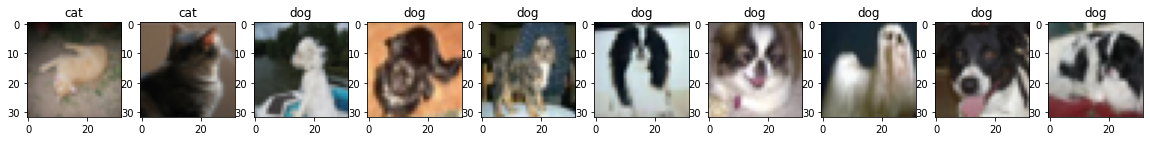

In [ ]:
rnd_index = [random.randint(0, (x_train.shape[0])) for rnd in range(10)]
fig, axs = plt.subplots(1,10, figsize=(20,2))
for i, index in enumerate(rnd_index):
    axs[i].imshow(x_train[index,:,:,], cmap = "gray")
    axs[i].set_title(classes[y_train[index]])  
plt.show()

In [ ]:
_, count = np.unique(y_train, return_counts= True)
print(f'Im Trainingsdatensatz befinden sich {count[0]} Beispiele von {classes[index_first_class]}')
print(f'Im Trainingsdatensatz befinden sich {count[1]} Beispiele von {classes[index_second_class]}')

Im Trainingsdatensatz befinden sich 5000 Beispiele von cat
Im Trainingsdatensatz befinden sich 5000 Beispiele von dog


In [ ]:
y_test = np.where((y_test == index_first_class),0,1)
y_train = np.where((y_train == index_first_class),0,1)

### Resize Data

In [ ]:
x_train = x_train.reshape(-1, 32*32*3)
x_test = x_test.reshape(-1, 32*32*3)

In [ ]:
x_train = x_train.reshape(x_train.shape[0],-1).T
x_test = x_test.reshape(x_test.shape[0],-1).T
y_train = y_train[np.newaxis,:]
y_test = y_test[np.newaxis,:]

# Logistic Regression


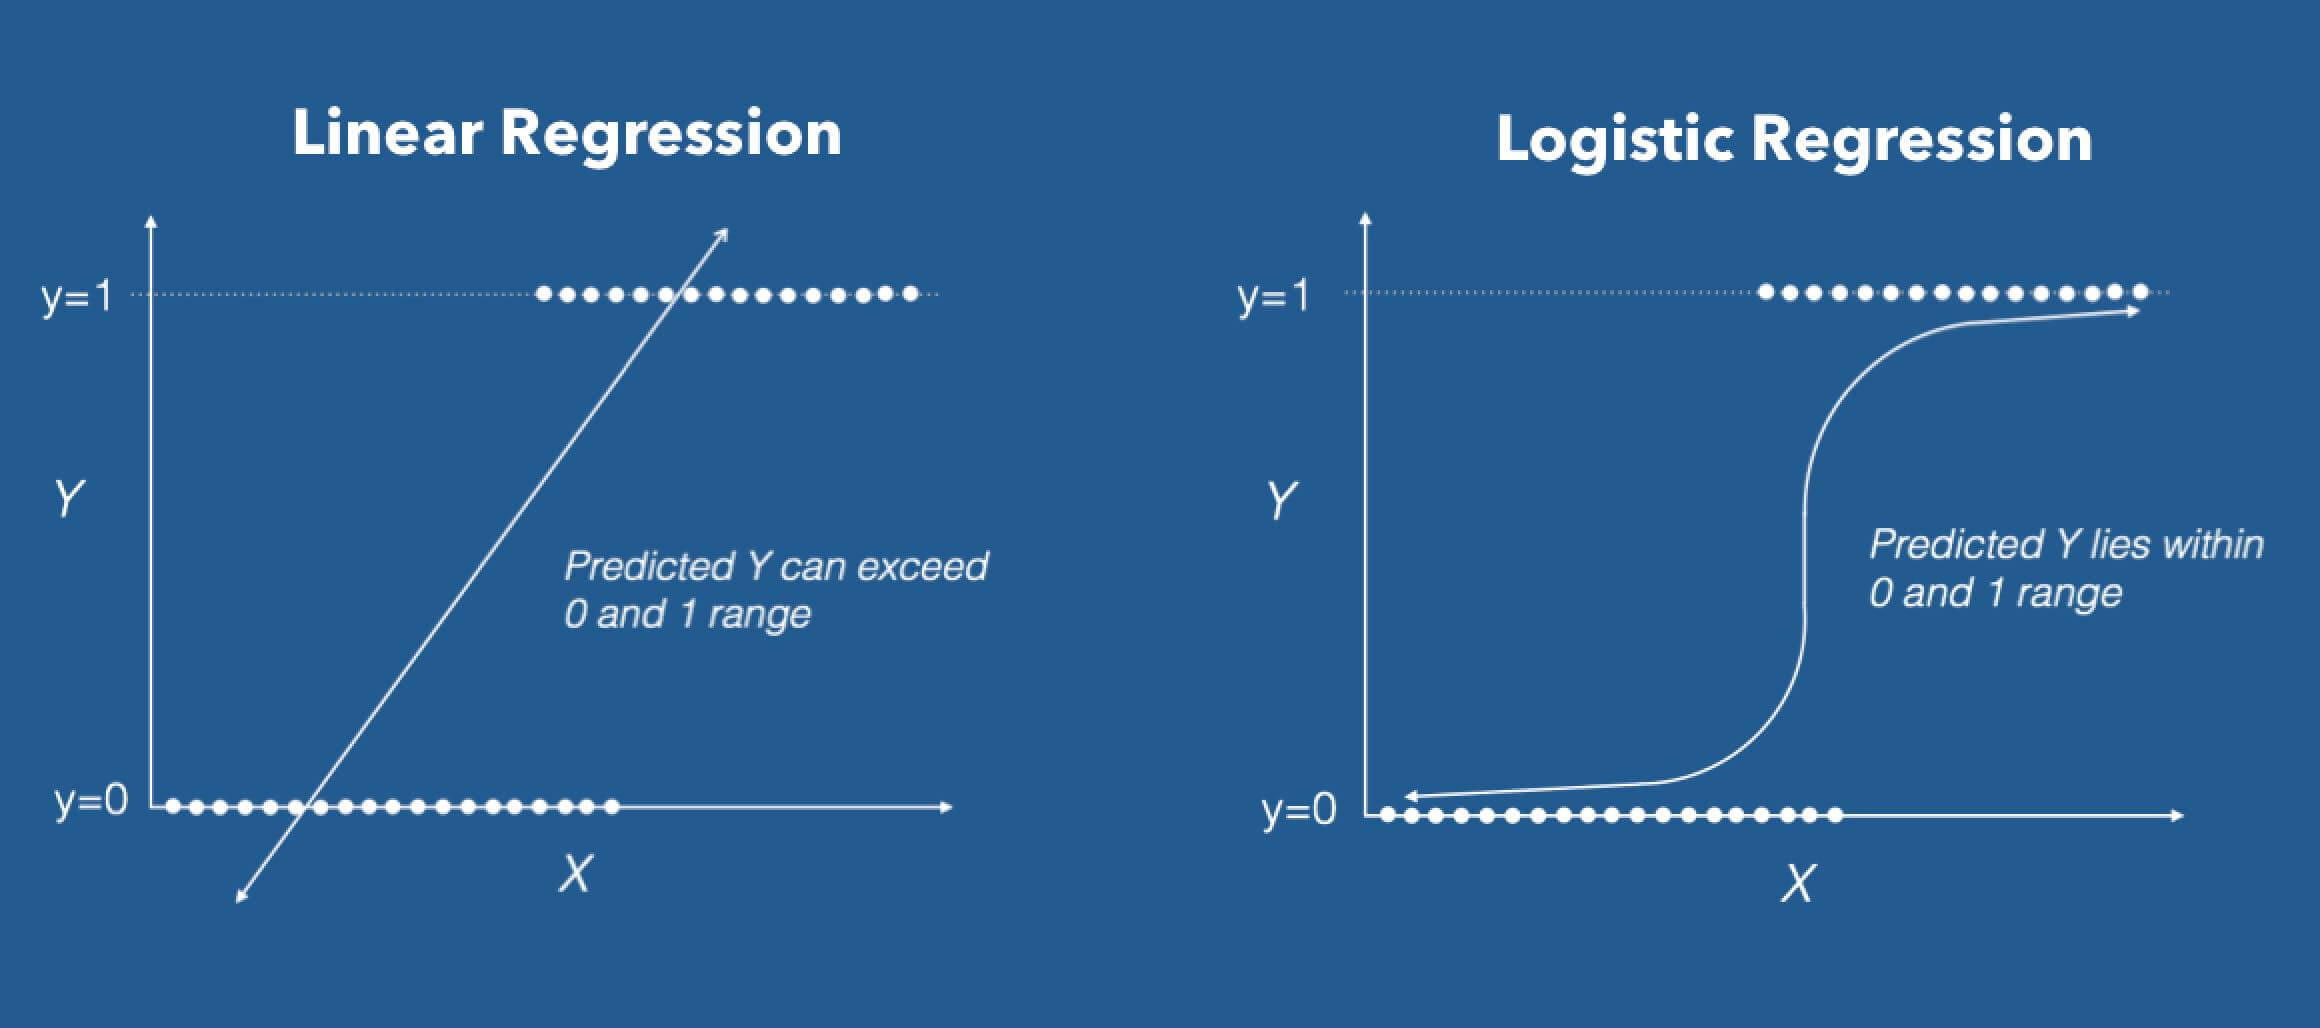

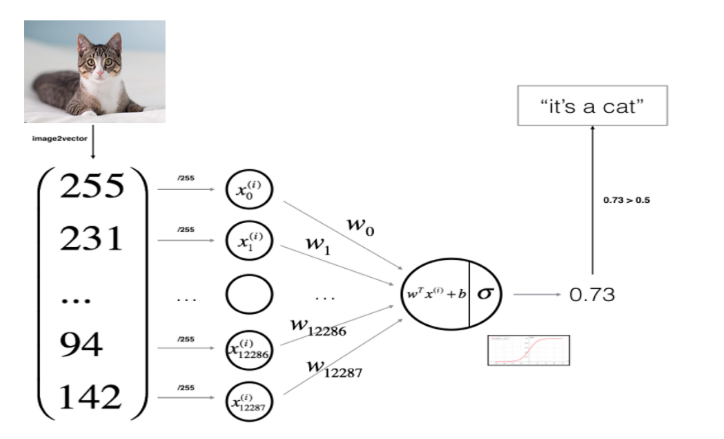


For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

### Sigmoid
$\hat{y}^{(i)} =a^i =\frac{1}{1+e^{z^i}}$


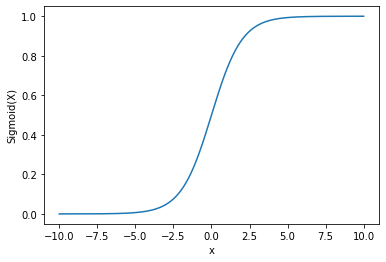

In [ ]:
x = np.linspace(-10, 10, 1000)
z = 1/(1 + np.exp(-x))
plt.plot(x, z)
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")
plt.show()

### Helper Functions

In [ ]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [ ]:
def initalize_weights(dim):
    w = np.zeros((dim,1))
    b = 0
    return w,b

In [ ]:
w,b =initalize_weights(5)
print(f"w= {w}")
print(w.shape)
print(f"b = {b}")

w= [[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
(5, 1)
b = 0


## Build Model

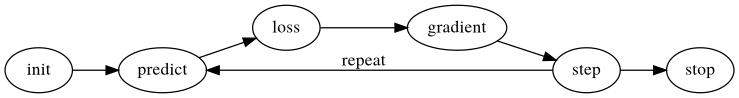

### Forward propagation

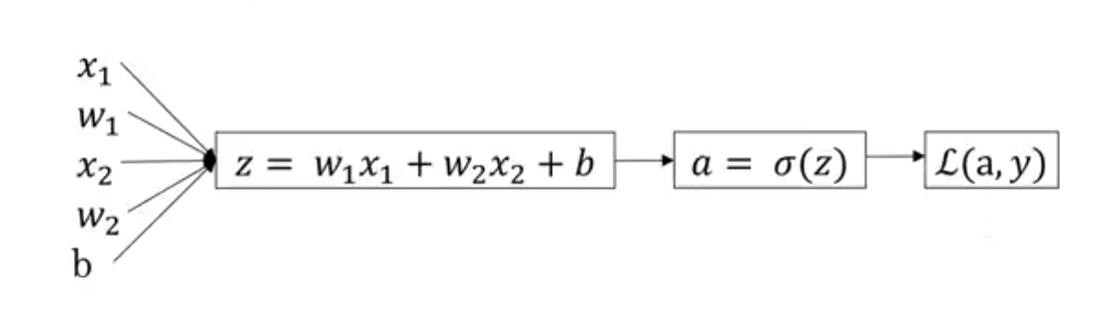

In [ ]:
def forward_prop(w,b,X,Y):
    #forward propagation
    A = sigmoid(np.dot(w.T, X)+ b)  
    return  A

In [ ]:
def compute_cost(A,Y,W):
    m = Y.shape[1]
    return -1/m*(np.sum(Y*np.log(A)+(1-Y)*np.log(1-A)))

### Backward Propagation

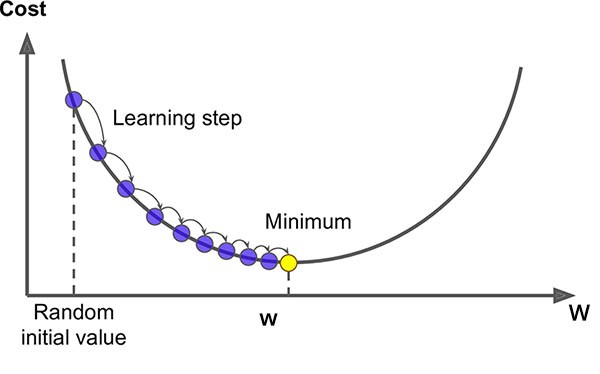

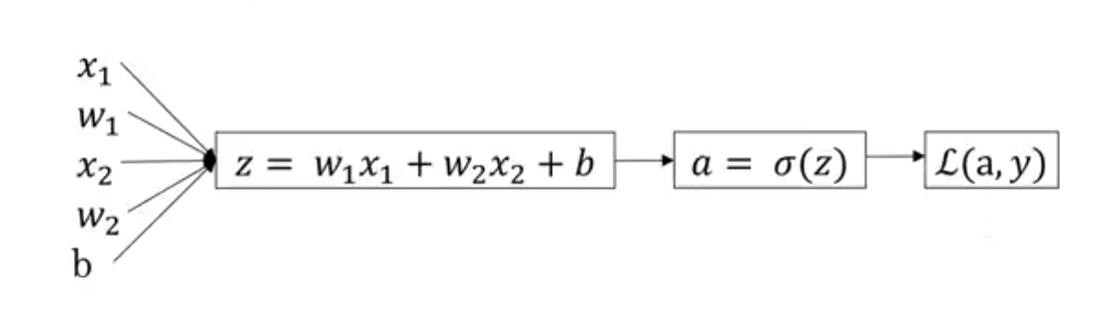

$$\partial a = \frac{\partial\mathcal{L(a,y)}}{\partial a} = -\frac{y}{a} + \frac{1-y}{1-a}$$
$$\partial z = \frac{\partial\mathcal{L(a,y)}}{\partial z} = 
\frac{\partial\mathcal{L(a,y)}}{\partial a} * \frac{\partial a}{\partial z}
=  a- y$$
$$\partial z = \frac{\partial\mathcal{L(a,y)}}{\partial w} = \partial w^{(i)} = x^{(i)} * \partial z
$$
$$\partial 
b = \frac{\partial\mathcal{L(a,y)}}{\partial b} =  \partial z
$$



In [ ]:
def backward_prop(w,b,X,Y,A):
    m = X.shape[1]
    dw = 1/m*(np.dot(X, ((A-Y).T)))
    db = 1/m*(np.sum(A-Y))
  
    grads = {"dw": dw,
              "db": db}
    return grads

In [ ]:
def optimize(w,b, X,Y, num_iterations, learning_rate):
    costs = []
  
    for i in range(num_iterations):
        A = forward_prop(w,b,X,Y)
        #compuste Cost 
        cost = compute_cost(A,Y,w)
        grads = backward_prop(w,b,X,Y,A)
    

        dw = grads["dw"]
        db = grads["db"]
        w = w - learning_rate*dw
        b = b - learning_rate*db
        params = {"w": w,"b": b}
        if i%100 == 0:

            print("Cost after iteration %i: %f" %(i,cost))
            costs.append(cost)

    
    return params, costs


In [ ]:
def predict(w,b,X):
    m = X.shape[1]
    w = w.reshape(X.shape[0], 1)
    Y_prediction = np.zeros((1,m))
  
    A = sigmoid(np.dot(w.T,X)+b)


    for i in range(A.shape[1]):
        Y_prediction[0][i] = 1 if A[0][i] > 0.5 else 0

    return Y_prediction

In [ ]:
def model_logistic(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate):
    w,b = initalize_weights(X_train.shape[0])
    params, costs = optimize(w,b,X_train,Y_train, num_iterations, learning_rate)
    w = params["w"]
    b = params["b"]
    
    Y_prediction_train = predict(w,b,X_train)
    Y_prediction_test = predict(w,b,X_test)
  

    print("train accuracy: {:.2f} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {:.2f} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    ret = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    return ret

### Standardize Data

In [ ]:
x_train = x_train / 255.
x_test = x_test/ 255.

## Train Model

In [ ]:
ret  = model_logistic(x_train, y_train, x_test, y_test, num_iterations=1000, learning_rate= 0.005)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.673018
Cost after iteration 200: 0.668277
Cost after iteration 300: 0.665524
Cost after iteration 400: 0.663685
Cost after iteration 500: 0.662331
Cost after iteration 600: 0.661261
Cost after iteration 700: 0.660370
Cost after iteration 800: 0.659599
Cost after iteration 900: 0.658913
train accuracy: 60.41 %
test accuracy: 59.60 %


## Train Model Evaluate Model

In [ ]:
classes_binary = [classes[index_first_class], classes[index_second_class]]

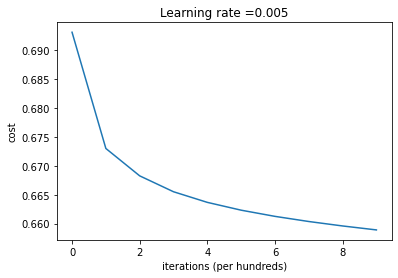

In [ ]:
costs = np.squeeze(ret['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(ret["learning_rate"]))
plt.show()

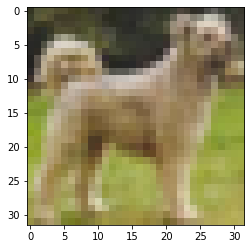

True Label : dog
Predicted Label : dog


In [ ]:
index = 1345
plt.imshow(x_test[:,index].reshape(32,32,3))
plt.show()
print(f"True Label : {classes_binary[y_test[0,index]]}")
print(f"Predicted Label : {classes_binary[int(ret['Y_prediction_test'][0,index])]}")

# Tensorflow

---





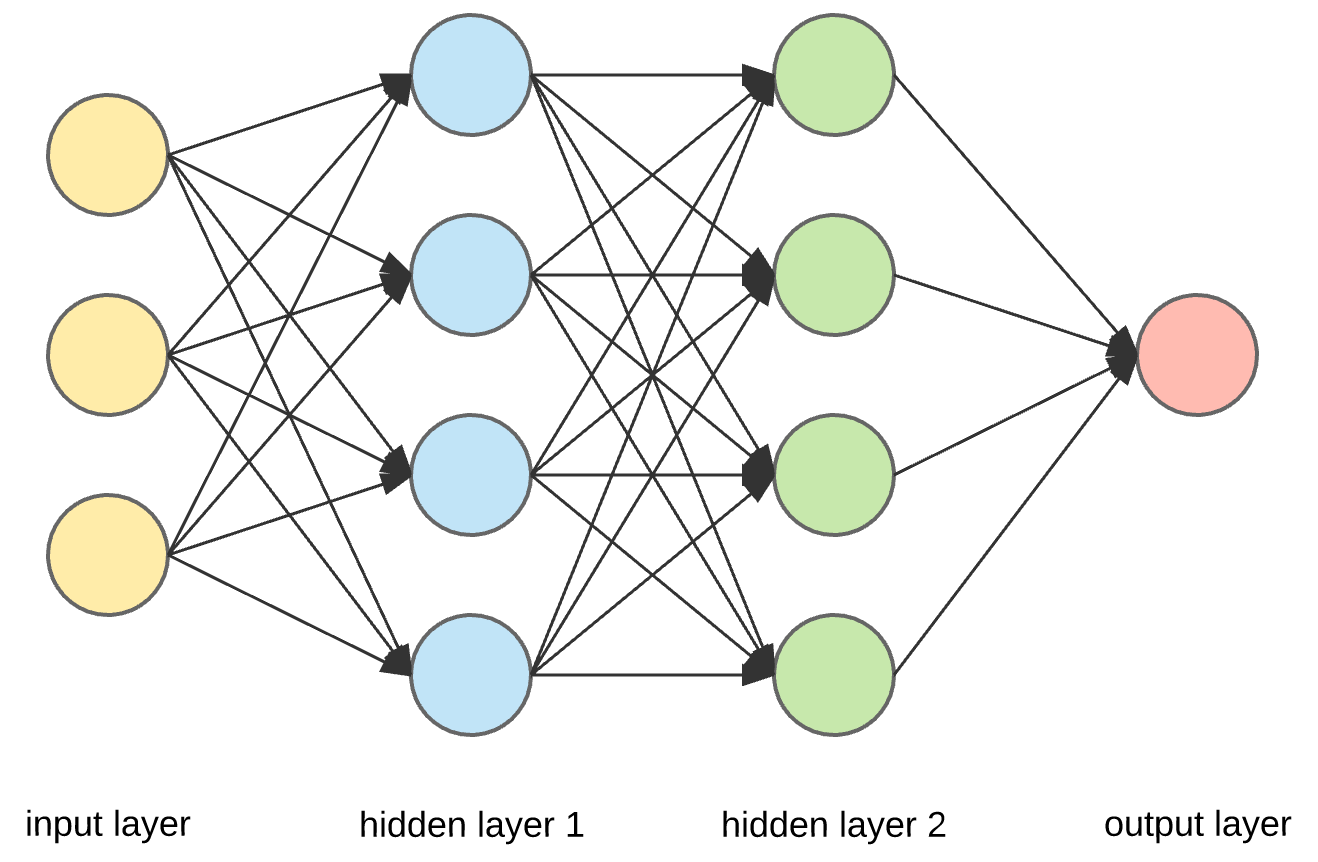

In [ ]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.layers import Flatten, Dense, Dropout


In [ ]:
tf.test.is_gpu_available(cuda_only=True)

True

In [ ]:
(x_train, y_train), (x_test, y_test)  = cifar10.load_data()

In [ ]:
x_test = x_test / 255.
x_train = x_train/ 255.

In [ ]:
index_train = np.where((y_train == index_first_class)| (y_train == index_second_class))[0]
index_test = np.where((y_test == index_first_class)| (y_test == index_second_class))[0]

In [ ]:
y_train = y_train[index_train]
x_train = x_train[index_train]
y_test = y_test[index_test]
x_test = x_test[index_test]

In [ ]:
y_test = np.where((y_test == index_first_class),0,1)
y_train = np.where((y_train == index_first_class),0,1)

'frog'

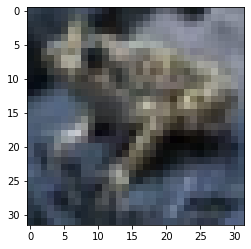

In [ ]:
plt.imshow(x_test[34])
classes_binary[y_test[34,0]]

In [ ]:
resnet = tensorflow.keras.applications.ResNet50V2(
    include_top=False,
    weights="imagenet",
    input_shape=(32,32,3),
)

94674944/94668760 [==============================] - 1s 0us/step


In [ ]:
resnet.trainable = True

In [ ]:
model = models.Sequential()
model.add(resnet)
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1, activation = "sigmoid"))

In [ ]:
model.compile(optimizer = "adam", loss ="binary_crossentropy",  metrics=['accuracy']  )

In [ ]:
history = model.fit(x_train,y_train, validation_split= 0.1,  epochs = 3) 

Epoch 1/3
282/282 [==============================] - 16s 39ms/step - loss: 0.6502 - accuracy: 0.7574 - val_loss: 0.6025 - val_accuracy: 0.8670
Epoch 2/3
282/282 [==============================] - 10s 36ms/step - loss: 0.3622 - accuracy: 0.8296 - val_loss: 0.3862 - val_accuracy: 0.8780
Epoch 3/3
282/282 [==============================] - 10s 36ms/step - loss: 0.3371 - accuracy: 0.8508 - val_loss: 0.4591 - val_accuracy: 0.8050


In [ ]:
model.evaluate(x_test,y_test)

63/63 [==============================] - 1s 12ms/step - loss: 0.2810 - accuracy: 0.8815


[0.28099843859672546, 0.8815000057220459]

In [ ]:
prob = model.predict(x_test)

In [ ]:
abs_dis= np.abs(y_test-prob)
top = np.where((abs_dis > 0.5))[0]

In [ ]:
preds = np.where((prob > 0.5), 1, 0)

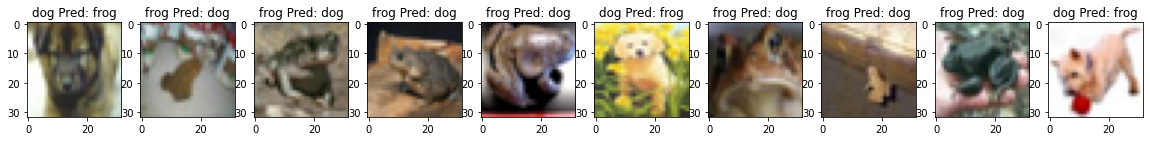

In [ ]:
fig, axs = plt.subplots(1,10, figsize=(20,2))
for i in range(10):
    axs[i].imshow(x_test[top[i],:,:,])
    axs[i].set_title(f'{classes_binary[y_test[top[i],0]]} Pred: {classes_binary[preds[top[i],0]]}')  
plt.show()

In [ ]:
def plot_accuracy(history):
    plt.title("Accuracy Vs Epochs")
    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
    plt.show()

In [ ]:
def plot_loss(history):
    plt.title("Loss Vs Epochs")
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
    plt.show()